# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

We need to study data collected over the last few years and determine which factors influence the price of a vehicle. We are going to study, amend the data if needed (missing values/duplicates) and analyse the data.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Review-2nd-Iteration" data-toc-modified-id="Review-2nd-Iteration-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Review 2nd Iteration</a></span></li><li><span><a href="#Review-3rd-Iteration" data-toc-modified-id="Review-3rd-Iteration-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Review 3rd Iteration</a></span></li></ul></li><li><span><a href="#What-sells-a-car?" data-toc-modified-id="What-sells-a-car?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>What sells a car?</a></span><ul class="toc-item"><li><span><a href="#Initialization" data-toc-modified-id="Initialization-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Initialization</a></span><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Explore-initial-data" data-toc-modified-id="Explore-initial-data-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Explore initial data</a></span></li><li><span><a href="#Conclusions-and-further-steps" data-toc-modified-id="Conclusions-and-further-steps-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Conclusions and further steps</a></span></li></ul></li><li><span><a href="#Treat-missing-values-(if-any)" data-toc-modified-id="Treat-missing-values-(if-any)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Treat missing values (if any)</a></span></li><li><span><a href="#Fix-data-types" data-toc-modified-id="Fix-data-types-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Fix data types</a></span></li><li><span><a href="#Enrich-data" data-toc-modified-id="Enrich-data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Enrich data</a></span></li><li><span><a href="#Check-clean-data" data-toc-modified-id="Check-clean-data-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Check clean data</a></span></li><li><span><a href="#Study-core-parameters" data-toc-modified-id="Study-core-parameters-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Study core parameters</a></span></li><li><span><a href="#Study-and-treat-outliers" data-toc-modified-id="Study-and-treat-outliers-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Study and treat outliers</a></span></li><li><span><a href="#Study-core-parameters-without-outliers" data-toc-modified-id="Study-core-parameters-without-outliers-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Study core parameters without outliers</a></span></li><li><span><a href="#Ads-lifetime" data-toc-modified-id="Ads-lifetime-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Ads lifetime</a></span></li><li><span><a href="#Average-price-per-each-type-of-vehicle" data-toc-modified-id="Average-price-per-each-type-of-vehicle-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Average price per each type of vehicle</a></span></li><li><span><a href="#Price-factors" data-toc-modified-id="Price-factors-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Price factors</a></span></li><li><span><a href="#General-conclusion" data-toc-modified-id="General-conclusion-1.12"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>General conclusion</a></span></li></ul></li></ul></div>

## Initialization

In [133]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt


### Load data

In [134]:
# Load the data file into a DataFrame
df = pd.read_csv('/datasets/vehicles_us.csv')

### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal


In [135]:
# print the general/summary information about the DataFrame
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [136]:
# print a sample of data
df.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


There shall be total of 51525 rows, there are columns with missing values, eg. 'model_year', 'cylinders', 'odometer', 'paint_color' & 'is_4wd'. Column 'is_4wd' contain the most missing values. And some format of the data is not correct, example year shall not integer not float.

There are extreme max values in column 'price' & 'odometer'.

Below are issues found at the first look of the data information.
1. The 'model_year' & 'cylinders' are float instead of integer.
2. For 'is_4wd' column, 1 shall be repsenting no but not a figure for the calculation later.
3. The 'date_posted' column is object, not in correct date format.

### Conclusions and further steps

There are missing values in serveral columns and 'is_4wd' column is missing (51525-25572)/51525*100% = 50% of the total data set. Definitely worth a deep dive into it before testing our hypothesis.

Meanwhile, we need to dive into other missing values columns and to inspect carefully if to really discard the missing values rows or to fill up with mean/median.

## Treat missing values (if any)

In [137]:
# Checking missing values for each column
print(df.isna().sum())

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


In [138]:
df.isnull().sum()/len(df)*100

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

In [139]:
df_na = df[df.isna().any(axis=1)]
df_na

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [140]:
# Checking unique values of missing values columns to check the data quality.

display(sorted(df['cylinders'].unique()))
print('\n')
display(df['paint_color'].unique())
print('\n')
display(df['is_4wd'].unique())

[3.0, 4.0, 5.0, 6.0, 8.0, nan, 10.0, 12.0]

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

array([ 1., nan])

In [141]:
total_car_model = df['model'].nunique()
print('Total car model in the data set:', total_car_model)

Total car model in the data set: 100


In [142]:
# to check if the unique data of 'model' consists of any name error or implicit duplicates.
display(sorted(df['model'].unique()))

['acura tl',
 'bmw x5',
 'buick enclave',
 'cadillac escalade',
 'chevrolet camaro',
 'chevrolet camaro lt coupe 2d',
 'chevrolet colorado',
 'chevrolet corvette',
 'chevrolet cruze',
 'chevrolet equinox',
 'chevrolet impala',
 'chevrolet malibu',
 'chevrolet silverado',
 'chevrolet silverado 1500',
 'chevrolet silverado 1500 crew',
 'chevrolet silverado 2500hd',
 'chevrolet silverado 3500hd',
 'chevrolet suburban',
 'chevrolet tahoe',
 'chevrolet trailblazer',
 'chevrolet traverse',
 'chrysler 200',
 'chrysler 300',
 'chrysler town & country',
 'dodge charger',
 'dodge dakota',
 'dodge grand caravan',
 'ford econoline',
 'ford edge',
 'ford escape',
 'ford expedition',
 'ford explorer',
 'ford f-150',
 'ford f-250',
 'ford f-250 sd',
 'ford f-250 super duty',
 'ford f-350 sd',
 'ford f150',
 'ford f150 supercrew cab xlt',
 'ford f250',
 'ford f250 super duty',
 'ford f350',
 'ford f350 super duty',
 'ford focus',
 'ford focus se',
 'ford fusion',
 'ford fusion se',
 'ford mustang',
 '

There are no name error or implicit duplicates in column 'model'.

There are missing values in column named 'model_year'. The missing value percentage is around 7% of the whole dataset. 

Model of a car may determines the year of the car, we can group by the `model` and fill the missing values based on median of `model_year` for each group.

In [143]:
df_model_agg = df.groupby('model')['model_year'].transform('median')
df['model_year'].fillna(df_model_agg, inplace=True)
df['model_year'] = df['model_year'].astype(int)
df['model_year'].describe()

count    51525.000000
mean      2009.793557
std          6.099381
min       1908.000000
25%       2007.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

There are missing values in column named 'cylinders'. The missing value percentage is around 10% of the whole dataset. 

Model of a car may determines the cylinders of the car, we can group by the `model` and fill the missing values based on median of `cylinders` for each group.

In [144]:
df_model_agg = df.groupby('model')['cylinders'].transform('median')
df['cylinders'].fillna(df_model_agg, inplace=True)
df['cylinders'].describe()

count    51525.000000
mean         6.121067
std          1.657457
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

Since 'paint_color' might not be the main factor which affect the price, and we could not delete them as we will loss 18% of data (9267/51525*100% = 18%), we fill the missing value with 'unspecified'.

In [145]:
df['paint_color'].fillna('unspecified', inplace=True)
display(df.head())
df.info()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unspecified,1.0,2018-06-23,19
1,25500,2011,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unspecified,NaN,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  int64  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 5.1+ MB


Since column 'is_4wd' is Boolean type (whether the vehicle has 4-wheel drive), which was detected as float as the false values (zero) are detected as NaN. Thus we are changing the data type of 'is_4wd' to boolean.

In [146]:
df['is_4wd'] = df['is_4wd'].astype(bool)

In [147]:
# Checking the missing values in column 'odometer'
df['odometer'].isna().sum()

7892

In [148]:
# Looking at the numerical description of the 'odometer':
df['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [149]:
# Looking at the count of 'odometer' which is zero:
df[df['odometer'] == 0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
352,7997,2009,gmc yukon,excellent,8.0,gas,0.0,automatic,SUV,white,True,2019-03-16,88
814,2995,1999,ford f-150,good,6.0,gas,0.0,manual,truck,unspecified,True,2019-03-14,16
1375,5888,2007,toyota 4runner,good,6.0,gas,0.0,automatic,SUV,black,True,2019-02-22,36
1461,1000,1992,gmc sierra 1500,good,8.0,gas,0.0,automatic,truck,unspecified,True,2018-09-28,47
1970,10988,2000,ford f-250 sd,good,8.0,diesel,0.0,automatic,truck,white,True,2018-11-21,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49170,3300,2002,hyundai santa fe,good,6.0,gas,0.0,automatic,wagon,white,True,2019-04-14,31
49284,3300,2002,hyundai santa fe,good,6.0,gas,0.0,automatic,wagon,white,True,2019-02-15,7
50412,25500,2008,jeep wrangler,good,6.0,gas,0.0,automatic,SUV,yellow,True,2018-06-12,48
50631,3600,2012,chrysler 200,good,4.0,gas,0.0,automatic,sedan,red,True,2018-07-24,90


Note that there are 172 records that the cars are zero mileage. Thus, there is be some error during data collection. Shall replace the zero with median which map to the model year.

In [150]:
# Looking at the numerical description of the 'model_year':
df['model_year'].describe()

count    51525.000000
mean      2009.793557
std          6.099381
min       1908.000000
25%       2007.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

To calculate the median value of odometer according to the model year and replace the missing values.

In [151]:
median_odometer_by_model_year = df.groupby(['model_year'])['odometer'].median()
display(median_odometer_by_model_year)

model_year
1908    169328.0
1929         NaN
1936     30000.0
1948      4000.0
1949      1800.0
          ...   
2015     78285.5
2016     53998.5
2017     41000.0
2018     20674.0
2019     14151.5
Name: odometer, Length: 68, dtype: float64

In [152]:
# Step 1: Create a dictionary containing the median values for 'odometer' based on 'model_year'
median_odometer_by_model_year_dict = median_odometer_by_model_year.to_dict()

# Step 2: Map 'model_year' to corresponding median 'odometer' value
df['median_odometer_by_model_year'] = df['model_year'].map(median_odometer_by_model_year_dict)

# Step 3: Replace missing 'odometer' values with the mapped median values
df.loc[df['odometer'].isnull(), 'odometer'] = df.loc[df['odometer'].isnull(), 'median_odometer_by_model_year']
df.loc[df['odometer'] == 0, 'odometer'] = df.loc[df['odometer'] == 0, 'model_year'].map(median_odometer_by_model_year_dict)


# Drop the temporary column used for mapping
df.drop(columns=['median_odometer_by_model_year'], inplace=True)

# df['odometer'] = df['odometer'].astype(int)
print(df['odometer'].describe())

count     51524.000000
mean     115618.570249
std       61746.375183
min           1.000000
25%       74000.000000
50%      114767.000000
75%      153000.000000
max      990000.000000
Name: odometer, dtype: float64


In [153]:
# Validate the dataframe again after treating missing values.
df.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        1
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [154]:
df[df['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929,ford f-150,good,8.0,gas,NaN,manual,other,silver,True,2018-11-18,59


In [155]:
df[df['model_year'] == 1929]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929,ford f-150,good,8.0,gas,NaN,manual,other,silver,True,2018-11-18,59


As there is only 1 record with model year of 1929, thus it remains unfilled even we filled up the median values for 'odometer' based on 'model_year'. The nearest next model year to 1929 is 1936, of which the odometer reading is 30,000. Thus we could fill up the odometer for model year 1929 as value of 30,000.

In [156]:
df.loc[df['model_year'] == 1929, 'odometer'] = 30000

In [157]:
df.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [158]:
# Check for duplicates if there is any.

df.duplicated().sum()

0

There is no duplicate value.

## Fix data types

In [159]:
# Converting the 'date_posted' from string to date time format.
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')
display(df.head())
df.info()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unspecified,True,2018-06-23,19
1,25500,2011,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,True,2019-02-07,79
3,1500,2003,ford f-150,fair,8.0,gas,161397.0,automatic,pickup,unspecified,True,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,True,2019-04-02,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.8+ MB


## Enrich data

In [160]:
# Add datetime values for when the ad was placed
df['day_of_week'] = df['date_posted'].dt.weekday
df['month'] = df['date_posted'].dt.month
df['year'] = df['date_posted'].dt.year
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month,year
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unspecified,True,2018-06-23,19,5,6,2018
1,25500,2011,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,True,2019-02-07,79,3,2,2019
3,1500,2003,ford f-150,fair,8.0,gas,161397.0,automatic,pickup,unspecified,True,2019-03-22,9,4,3,2019
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,True,2019-04-02,28,1,4,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,True,2018-10-03,37,2,10,2018
51521,2700,2002,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,True,2018-11-14,22,2,11,2018
51522,3950,2009,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,True,2018-11-15,32,3,11,2018
51523,7455,2013,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,True,2018-07-02,71,0,7,2018


In [161]:
# Add the vehicle's age when the ad was placed
df['vehicle_age'] = df['year'] - df['model_year'] + 1
df['vehicle_age'].describe()

count    51525.000000
mean         9.513906
std          6.112976
min          1.000000
25%          5.000000
50%          9.000000
75%         13.000000
max        111.000000
Name: vehicle_age, dtype: float64

In [162]:
# Add the vehicle's average mileage per year
df['average_mileage_per_year'] = df['odometer'] / df['vehicle_age']
df.describe()

,price,model_year,cylinders,odometer,days_listed,day_of_week,month,year,vehicle_age,average_mileage_per_year
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.793557,6.121067,115616.908559,39.55476,3.005434,6.628491,2018.307462,9.513906,14551.598946
std,10040.803015,6.099381,1.657457,61746.928044,28.20427,1.997759,3.474134,0.461447,6.112976,8586.927869
min,1.000000,1908.000000,3.000000,1.000000,0.00000,0.000000,1.000000,2018.000000,1.000000,0.033333
25%,5000.000000,2007.000000,4.000000,74000.000000,19.00000,1.000000,3.000000,2018.000000,5.000000,9894.736842
50%,9000.000000,2011.000000,6.000000,114766.000000,33.00000,3.000000,7.000000,2018.000000,9.000000,13328.461538
75%,16839.000000,2014.000000,8.000000,153000.000000,53.00000,5.000000,10.000000,2019.000000,13.000000,17690.714286
max,375000.000000,2019.000000,12.000000,990000.000000,271.00000,6.000000,12.000000,2019.000000,111.000000,373200.000000


In [163]:
# It might help to replace the condition values with something that can be manipulated more easily
# In the condition column, replace string values with a numeric scale:(new = 5, like new = 4, excellent = 3, good = 2, fair = 1, salvage = 0)
condition_mapping = {
    'new': 5,
    'like new': 4,
    'excellent': 3,
    'good': 2,
    'fair': 1,
    'salvage': 0
}
# Replace string values with numeric values using the mapping
df['condition'] = df['condition'].map(condition_mapping)
df['condition'] = df['condition'].astype(str)
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month,year,vehicle_age,average_mileage_per_year
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unspecified,True,2018-06-23,19,5,6,2018,8,18125.000000
1,25500,2011,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018,8,11088.125000
2,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,True,2019-02-07,79,3,2,2019,7,15714.285714
3,1500,2003,ford f-150,1,8.0,gas,161397.0,automatic,pickup,unspecified,True,2019-03-22,9,4,3,2019,17,9493.941176
4,14900,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,True,2019-04-02,28,1,4,2019,3,26967.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,4,6.0,gas,88136.0,automatic,sedan,black,True,2018-10-03,37,2,10,2018,6,14689.333333
51521,2700,2002,honda civic,0,4.0,gas,181500.0,automatic,sedan,white,True,2018-11-14,22,2,11,2018,17,10676.470588
51522,3950,2009,hyundai sonata,3,4.0,gas,128000.0,automatic,sedan,blue,True,2018-11-15,32,3,11,2018,10,12800.000000
51523,7455,2013,toyota corolla,2,4.0,gas,139573.0,automatic,sedan,black,True,2018-07-02,71,0,7,2018,6,23262.166667


## Check clean data

In [164]:
# print the general/summary information about the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   price                     51525 non-null  int64         
 1   model_year                51525 non-null  int64         
 2   model                     51525 non-null  object        
 3   condition                 51525 non-null  object        
 4   cylinders                 51525 non-null  float64       
 5   fuel                      51525 non-null  object        
 6   odometer                  51525 non-null  float64       
 7   transmission              51525 non-null  object        
 8   type                      51525 non-null  object        
 9   paint_color               51525 non-null  object        
 10  is_4wd                    51525 non-null  bool          
 11  date_posted               51525 non-null  datetime64[ns]
 12  days_listed       

In [165]:
# print a sample of data
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month,year,vehicle_age,average_mileage_per_year
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,unspecified,True,2018-06-23,19,5,6,2018,8,18125.000000
1,25500,2011,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018,8,11088.125000
2,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,True,2019-02-07,79,3,2,2019,7,15714.285714
3,1500,2003,ford f-150,1,8.0,gas,161397.0,automatic,pickup,unspecified,True,2019-03-22,9,4,3,2019,17,9493.941176
4,14900,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,True,2019-04-02,28,1,4,2019,3,26967.666667
5,14990,2014,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,2,6,2018,5,11590.800000
6,12990,2015,toyota camry,3,4.0,gas,79212.0,automatic,sedan,white,True,2018-12-27,73,3,12,2018,4,19803.000000
7,15990,2013,honda pilot,3,6.0,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,0,1,2019,7,15639.000000
8,11500,2012,kia sorento,3,4.0,gas,104174.0,automatic,SUV,unspecified,True,2018-07-16,19,0,7,2018,7,14882.000000
9,9200,2008,honda pilot,3,6.0,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,4,2,2019,12,12265.916667


## Study core parameters

Studying how outliers affect the form and readability of the histograms by below parameters:

- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

In [166]:
# Define a function to plot histograms
def plot_histogram(data, column_name, bins=20, log_scale=False):
    plt.figure(figsize=(10, 10))
    plt.hist(data, bins=bins, log=log_scale)
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

In [167]:
# Define a function to plot bar plots for categorical variables
def plot_bar(data, column_name):
    plt.figure(figsize=(10, 10))
    data[column_name].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

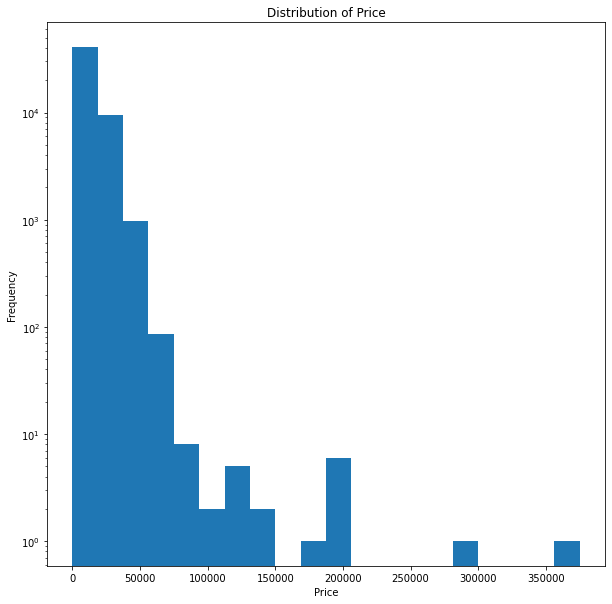

In [168]:
# Plotting histogram of 'price'
plot_histogram(df['price'], 'Price', log_scale=True)


As seen from the graph, there are few higher prices on the right, which are more than 150,000. The data is left skewed.

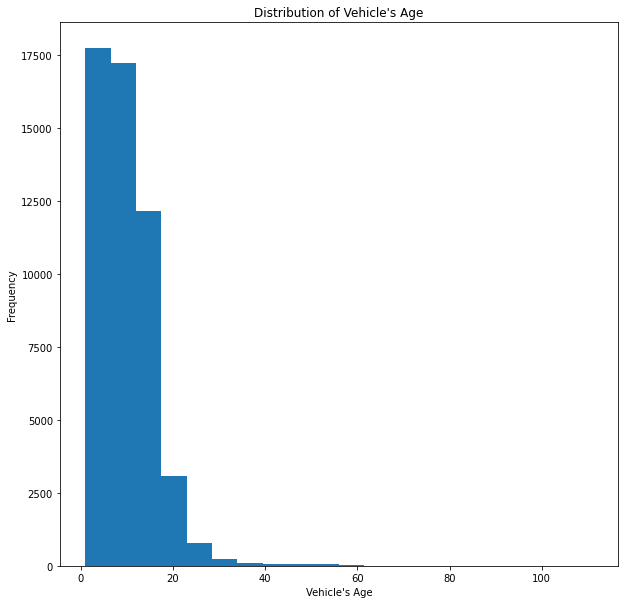

In [169]:
# Plotting histogram of 'vehicle_age'
plot_histogram(df['vehicle_age'], "Vehicle's Age")


As seen from the graph, the vehicle's age are mostly less than 20 years old.

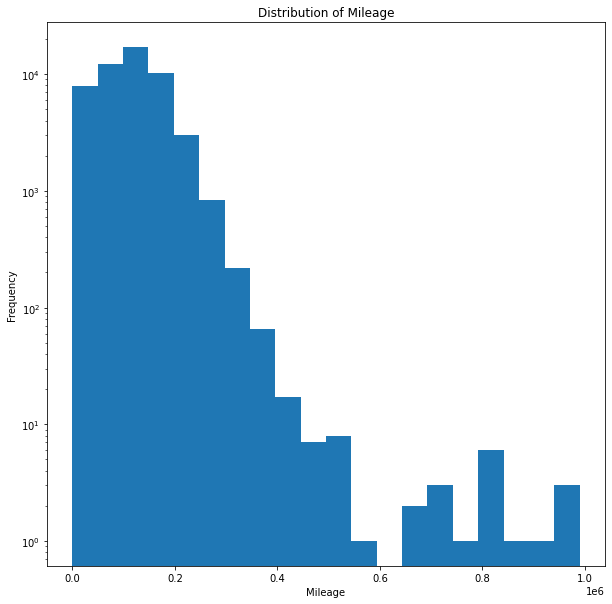

In [170]:
# Plotting histogram of 'odometer'
plot_histogram(df['odometer'], 'Mileage', log_scale=True)


As seen from the graph, there are few higher mileage on the right, which are more than 600,000.

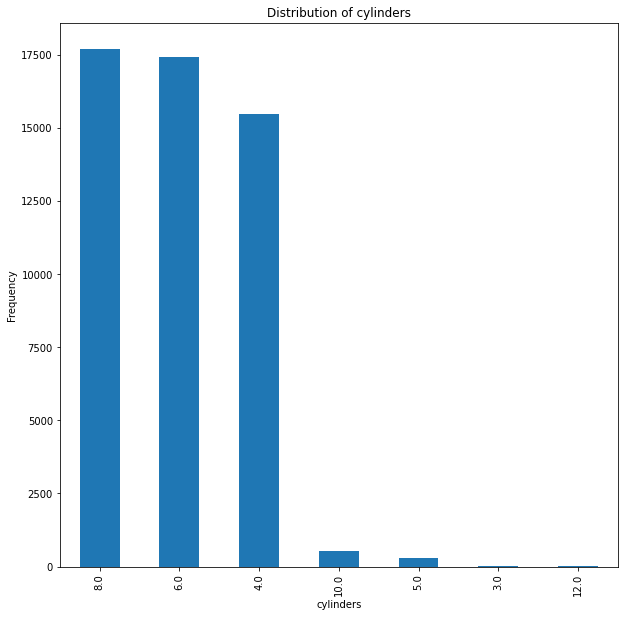

In [171]:
# Plotting bar graph of 'cylinders'
plot_bar(df, 'cylinders')


As seen from the graph, most of the vehicles are 8, 6 & 4 cylinders.

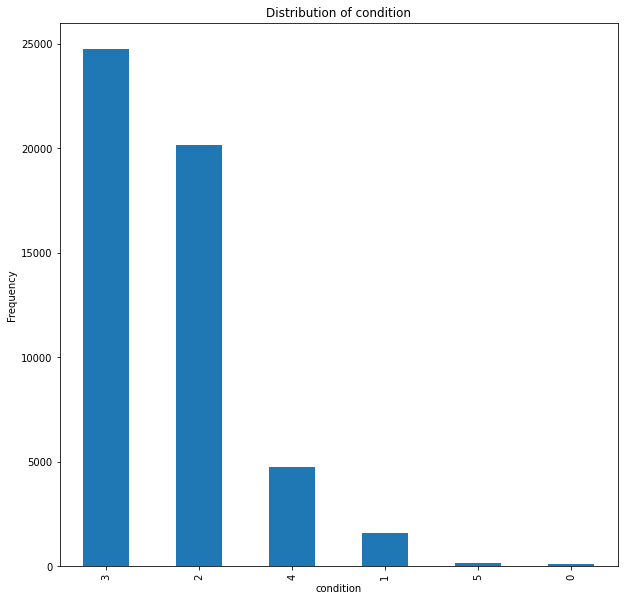

In [172]:
# Plotting bar graph of 'condition'
plot_bar(df, 'condition')


As seen from the graph, most of the cars are within condition 3 (excellent) & 2 (good).

## Study and treat outliers


Checking the distribution of hte dataframe again.

In [173]:
df.describe()

,price,model_year,cylinders,odometer,days_listed,day_of_week,month,year,vehicle_age,average_mileage_per_year
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.793557,6.121067,115616.908559,39.55476,3.005434,6.628491,2018.307462,9.513906,14551.598946
std,10040.803015,6.099381,1.657457,61746.928044,28.20427,1.997759,3.474134,0.461447,6.112976,8586.927869
min,1.000000,1908.000000,3.000000,1.000000,0.00000,0.000000,1.000000,2018.000000,1.000000,0.033333
25%,5000.000000,2007.000000,4.000000,74000.000000,19.00000,1.000000,3.000000,2018.000000,5.000000,9894.736842
50%,9000.000000,2011.000000,6.000000,114766.000000,33.00000,3.000000,7.000000,2018.000000,9.000000,13328.461538
75%,16839.000000,2014.000000,8.000000,153000.000000,53.00000,5.000000,10.000000,2019.000000,13.000000,17690.714286
max,375000.000000,2019.000000,12.000000,990000.000000,271.00000,6.000000,12.000000,2019.000000,111.000000,373200.000000


In [174]:
# checking the count of 'price' reading more than 150,000, as see from the histogram above.
display((df['price'] > 150000).sum())

9

In [175]:
# removing the rows that the 'price' more than 150,000, which could be outlier.
df = df[df['price'] <= 150000]

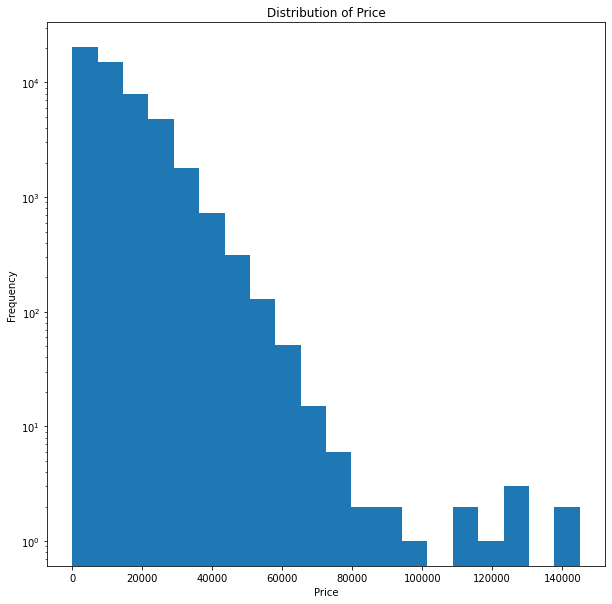

In [176]:
#plot the histogram again to see the distribution
plot_histogram(df['price'], 'Price', log_scale=True)

After removing the rows that the 'price' more than 150,000, there are still some vehicles those are at higher price at right side, which is more than 80,000. But we do not exclude this as data is skewed to left as the price for the vehicles are more expensive if the vehicle model is new.

<AxesSubplot:>

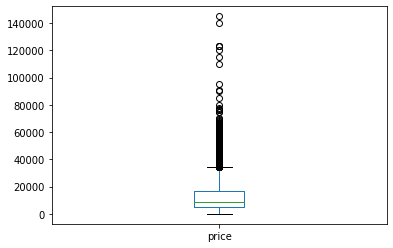

In [177]:
# Check for Outliers for 'price'
df['price'].plot(kind='box')

In [178]:
# checking the count of 'odometer' reading more than 600,000 as seen from the previous histogram.
display((df['odometer'] > 600000).sum())

17

In [179]:
# removing the rows that the 'odometer' more than 600,000, which are the outliers.
df = df[df['odometer'] <= 600000]

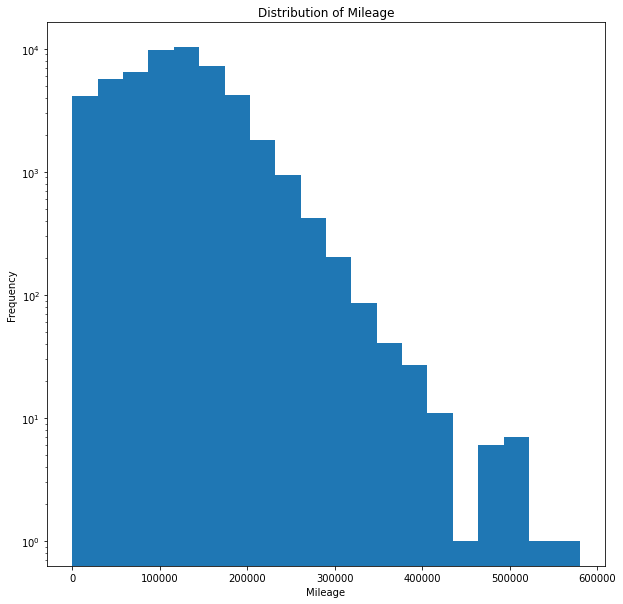

In [180]:
#plot the histogram again to see the distribution
plot_histogram(df['odometer'], 'Mileage', log_scale=True)

After removing the rows that the 'odometer' more than 600,000, there are still some vehicles those are at higher mileage at right side, which is more than 400,000. But we do not exclude this as data is skewed to left as the mileage for the vehicles are lesser if the vehicle model is new.

<AxesSubplot:>

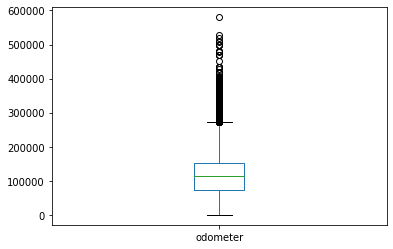

In [181]:
# Check for Outliers: The 'odometer' values range from 0 to 990,000, and there might be outliers at both ends. Visualizing the data using a box plot.
df['odometer'].plot(kind='box')

In [182]:
def remove_outliers(data, column, lower_limit, upper_limit):
  
    return data[(data[column] >= lower_limit) & (data[column] <= upper_limit)]

def apply_recursive_outlier_filter(data, iterations=3):
    
    filtered_data = data.copy()
    
    for _ in range(iterations):
        for column in filtered_data.select_dtypes(include=['number']).columns:
            Q1 = filtered_data[column].quantile(0.25)
            Q3 = filtered_data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_limit = Q1 - 1.5 * IQR
            upper_limit = Q3 + 1.5 * IQR
            filtered_data = remove_outliers(filtered_data, column, lower_limit, upper_limit)
    
    return filtered_data

# Apply the recursive outlier filter to the DataFrame
df_filtered = apply_recursive_outlier_filter(df)

# Print the updated DataFrame
df_filtered.info()
df_filtered.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41826 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   price                     41826 non-null  int64         
 1   model_year                41826 non-null  int64         
 2   model                     41826 non-null  object        
 3   condition                 41826 non-null  object        
 4   cylinders                 41826 non-null  float64       
 5   fuel                      41826 non-null  object        
 6   odometer                  41826 non-null  float64       
 7   transmission              41826 non-null  object        
 8   type                      41826 non-null  object        
 9   paint_color               41826 non-null  object        
 10  is_4wd                    41826 non-null  bool          
 11  date_posted               41826 non-null  datetime64[ns]
 12  days_listed       

,price,model_year,cylinders,odometer,days_listed,day_of_week,month,year,vehicle_age,average_mileage_per_year
count,41826.000000,41826.000000,41826.000000,41826.000000,41826.000000,41826.000000,41826.000000,41826.000000,41826.000000,41826.000000
mean,10717.248984,2009.876823,6.019701,116170.866590,36.279993,3.005379,6.579998,2018.314972,9.438149,13434.929559
std,7250.098671,4.665975,1.648472,52603.820368,22.658580,1.996229,3.486306,0.464510,4.673391,4929.797401
min,1.000000,1998.000000,3.000000,677.000000,0.000000,0.000000,1.000000,2018.000000,1.000000,154.250000
25%,4995.000000,2007.000000,4.000000,78637.250000,18.000000,1.000000,3.000000,2018.000000,6.000000,10047.242997
50%,8900.000000,2010.000000,6.000000,117687.000000,32.000000,3.000000,7.000000,2018.000000,9.000000,13046.000000
75%,14999.000000,2013.000000,8.000000,151840.500000,51.000000,5.000000,10.000000,2019.000000,13.000000,16640.000000
max,30000.000000,2019.000000,12.000000,260569.000000,100.000000,6.000000,12.000000,2019.000000,22.000000,26531.750000


The 'data_without_outliers' dataframe consists of 41,826 records, which is around 81% (41826/51525 *100% = 81%) of original data set. 

A function is created to return the upper and lower limt, and a recursive filter is then applied on this values for each columns.

All columns that have outliers will be removed through this function.

## Study core parameters without outliers

array([[<AxesSubplot:title={'center':'vehicle_age'}>]], dtype=object)

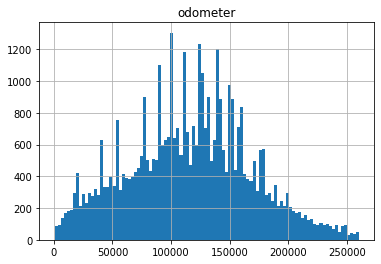

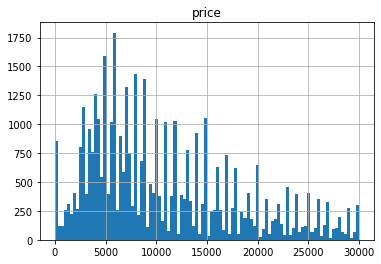

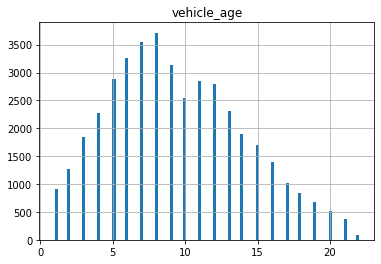

In [183]:
# New plot without outliers for 'odometer', 'price' & 'vehicle_age'.
df_filtered.hist('odometer', bins=100)
df_filtered.hist('price', bins=100)
df_filtered.hist('vehicle_age', bins=100)

<AxesSubplot:>

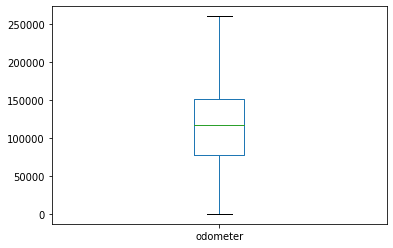

In [184]:
df_filtered['odometer'].plot(kind='box')


<AxesSubplot:>

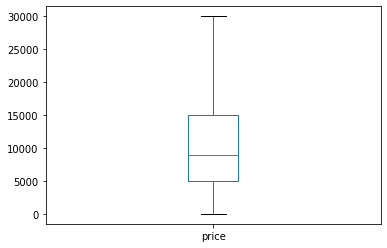

In [185]:
df_filtered['price'].plot(kind='box')

<AxesSubplot:>

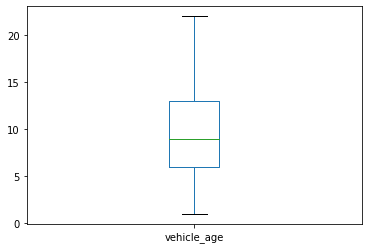

In [186]:
df_filtered['vehicle_age'].plot(kind='box')

After plotting the new graphs, we could conclude that there are no outliers from the final dataframe columns of 'price', 'odometer' & 'vehicle_age'.

Comparing the data before and after the deleting of the outliers, there are only 41,826 records left, which is around 81% (41826/51525 *100% = 81%) of original data set.

With excluding the outliers, theere is no outliers as seen from the boxplots.

## Ads lifetime

Study how many days advertisements were displayed (`days_listed`). Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.

In [187]:
# Calculate the mean and median of 'days_listed'. 
df_filtered['days_listed'].min()
df_filtered['days_listed'].max()
median_days_listed = df_filtered['days_listed'].median()
mean_days_listed = df_filtered['days_listed'].mean()

display(f"Minimum days listed: {df_filtered['days_listed'].min():.2f}")
display(f"Maximum days listed: {df_filtered['days_listed'].max():.2f}")
display(f"Mean days listed: {mean_days_listed:.2f}")
display(f"Median days listed: {median_days_listed:.2f}")

'Minimum days listed: 0.00'

'Maximum days listed: 100.00'

'Mean days listed: 36.28'

'Median days listed: 32.00'

In [188]:
#Describe the typical lifetime of an ad. 
print(f"Typical lifetime of an ad: Median days listed = {median_days_listed:.2f} days")


Typical lifetime of an ad: Median days listed = 32.00 days


In [189]:
# Checking the distribution of 'days_listed'.
df_filtered['days_listed'].describe()

count    41826.000000
mean        36.279993
std         22.658580
min          0.000000
25%         18.000000
50%         32.000000
75%         51.000000
max        100.000000
Name: days_listed, dtype: float64

In [190]:
# Checking the count of 'days_listed' more than 53 days which is extra long.
(df_filtered['days_listed'] > 51).sum()

10012

In [191]:
# Determine when ads were removed quickly, and when they were listed for an abnormally long time.
quickly_removed_ads = df_filtered[df_filtered['days_listed'] < median_days_listed]
long_listed_ads = df_filtered[df_filtered['days_listed'] > median_days_listed]

print(f"Number of ads removed quickly: {len(quickly_removed_ads)}")
print(f"Number of ads listed for an abnormally long time: {len(long_listed_ads)}")

Number of ads removed quickly: 20484
Number of ads listed for an abnormally long time: 20632


## Average price per each type of vehicle

Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.

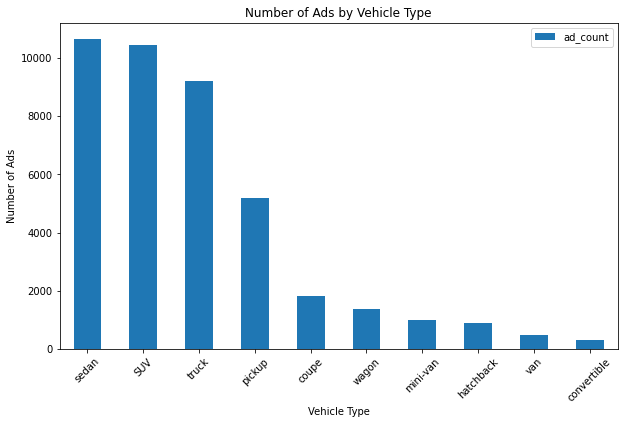

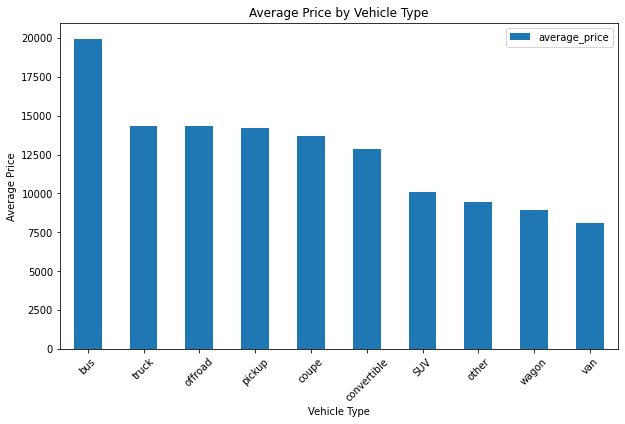

Top vehicle types: ['sedan', 'SUV']


In [192]:
# Group data by vehicle type and calculate count and average price
vehicle_type_stats = df_filtered.groupby('type').agg({'type': 'count', 'price': 'mean'})
vehicle_type_stats.rename(columns={'type': 'ad_count', 'price': 'average_price'}, inplace=True)

# Plot the graph showing the dependence of ad count on vehicle type
vehicle_type_stats.sort_values(by='ad_count', ascending=False).head(10).plot(kind='bar', y='ad_count', figsize=(10, 6))
plt.title('Number of Ads by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Ads')
plt.xticks(rotation=45)
plt.show()

# Plot the graph showing the dependence of average_price on vehicle type
vehicle_type_stats.sort_values(by='average_price', ascending=False).head(10).plot(kind='bar', y='average_price', figsize=(10, 6))
plt.title('Average Price by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

# Select the two types with the greatest number of ads
top_vehicle_types = vehicle_type_stats.sort_values(by='ad_count', ascending=False).head(2).index.tolist()
print("Top vehicle types:", top_vehicle_types)

The top advertised top vehicles types are sedan & SUV while the least one is van & convertible.

Bus has the highest average price, followed by truck, offroad, pickup, coupe & convertible, which are more or less around the same price. The prices of SUV, other, wagon & van are the lowest among others.

## Price factors

In [193]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41826 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   price                     41826 non-null  int64         
 1   model_year                41826 non-null  int64         
 2   model                     41826 non-null  object        
 3   condition                 41826 non-null  object        
 4   cylinders                 41826 non-null  float64       
 5   fuel                      41826 non-null  object        
 6   odometer                  41826 non-null  float64       
 7   transmission              41826 non-null  object        
 8   type                      41826 non-null  object        
 9   paint_color               41826 non-null  object        
 10  is_4wd                    41826 non-null  bool          
 11  date_posted               41826 non-null  datetime64[ns]
 12  days_listed       

Checking which factors impact the price the most on sedan car.

,price,model_year,vehicle_age,odometer,cylinders,average_mileage_per_year
price,1.000000,0.622676,-0.619422,-0.609841,-0.049873,0.080421
model_year,0.622676,1.000000,-0.994128,-0.693784,-0.122426,0.417032
vehicle_age,-0.619422,-0.994128,1.000000,0.691226,0.121578,-0.432033
odometer,-0.609841,-0.693784,0.691226,1.000000,0.075184,0.253027
cylinders,-0.049873,-0.122426,0.121578,0.075184,1.000000,-0.061154
average_mileage_per_year,0.080421,0.417032,-0.432033,0.253027,-0.061154,1.000000


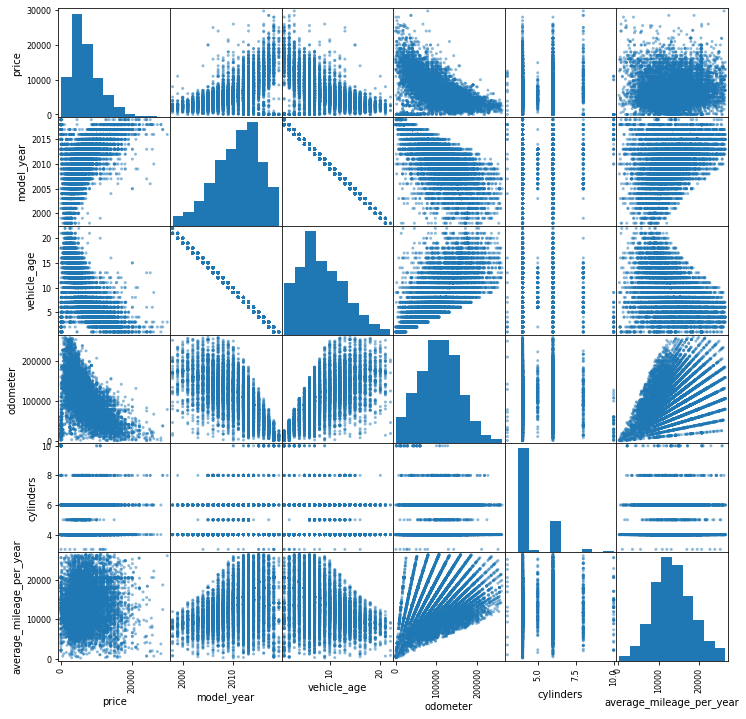

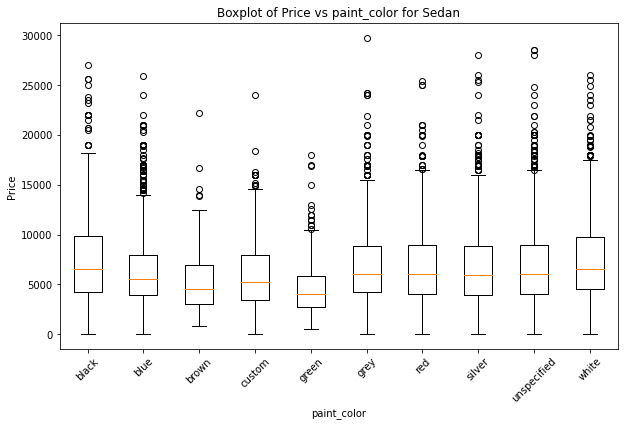

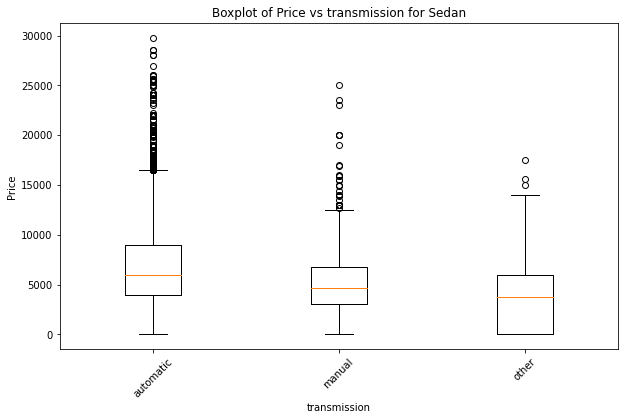

In [194]:
# Filtered data for sedan
sedan_data = df_filtered[df_filtered['type'] == 'sedan']

# Features to analyze
features = ['price', 'model_year', 'model', 'vehicle_age', 'odometer', 'condition', 'transmission', 'paint_color', 'cylinders', 'average_mileage_per_year']

# Calculate correlation matrix for sedans
display(sedan_data[features].corr())
sedan_corr_matrix = pd.plotting.scatter_matrix(sedan_data[features], figsize=(12, 12))

plt.show()

# Analyzing relationships between price and categorical variables (paint_color and transmission)
categorical_features = ['paint_color', 'transmission']
for feature in categorical_features:
    # Filter data for instances with more than 50 ads
    valid_instances = sedan_data[feature].value_counts()[sedan_data[feature].value_counts() >= 50].index
    sedan_filtered = sedan_data[sedan_data[feature].isin(valid_instances)]
    
    # Create box plots using matplotlib.pyplot
    plt.figure(figsize=(10, 6))
    grouped_data = sedan_filtered.groupby(feature)['price'].apply(list)
    plt.boxplot(grouped_data, labels=grouped_data.index)
    plt.title(f'Boxplot of Price vs {feature} for Sedan')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.show()

The price of the sedan car are negatively impacted by odometer & vehicle age. That means, the higher the mileage & the vehicle age, the price of the vehicle is cheaper.

From the boxplot, the colour of the sedan car are not really affecting the price of the car much.

Meanwhile, we can see the price of the sedan car with automatic transmission has the higher prices, followed by manual & other.

Checking which factors impact the price the most on SUV car.

,price,model_year,vehicle_age,odometer,cylinders,average_mileage_per_year
price,1.000000,0.576634,-0.574365,-0.565187,-0.022564,0.133986
model_year,0.576634,1.000000,-0.994817,-0.707295,-0.291568,0.478633
vehicle_age,-0.574365,-0.994817,1.000000,0.704533,0.290166,-0.492298
odometer,-0.565187,-0.707295,0.704533,1.000000,0.266063,0.168956
cylinders,-0.022564,-0.291568,0.290166,0.266063,1.000000,-0.081447
average_mileage_per_year,0.133986,0.478633,-0.492298,0.168956,-0.081447,1.000000


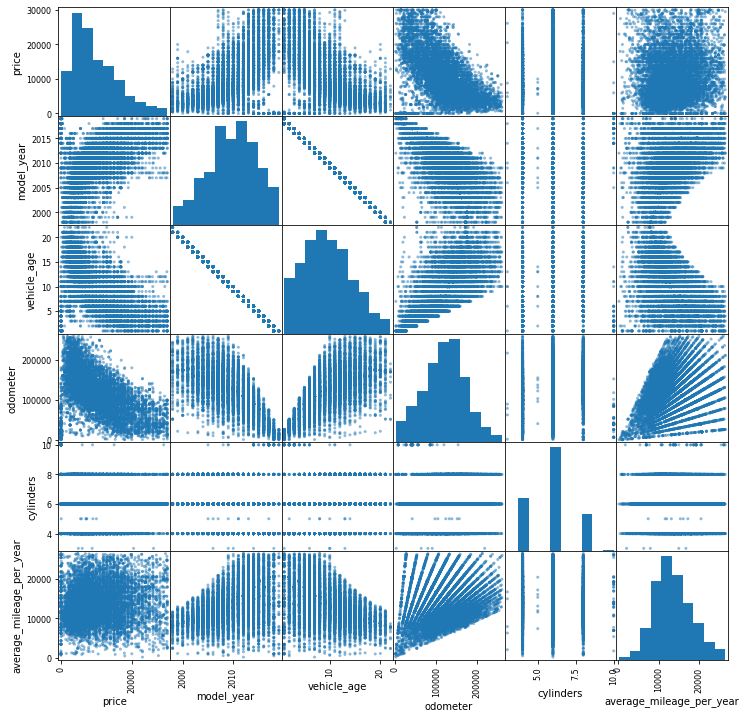

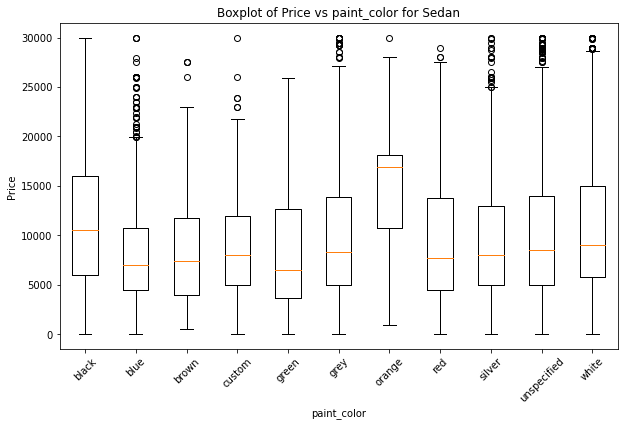

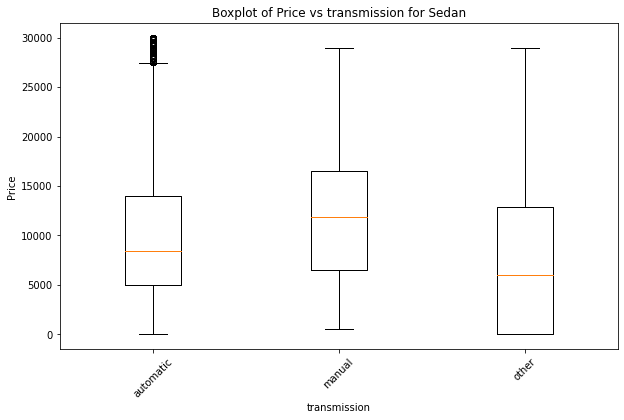

In [195]:
# Filtered data for SUV
suv_data = df_filtered[df_filtered['type'] == 'SUV']

# Features to analyze
features = ['price', 'model_year', 'model', 'vehicle_age', 'odometer', 'condition', 'transmission', 'paint_color', 'cylinders', 'average_mileage_per_year']

# Calculate correlation matrix for SUVs
display(suv_data[features].corr())
suv_corr_matrix = pd.plotting.scatter_matrix(suv_data[features], figsize=(12, 12))

plt.show()

# Analyzing relationships between price and categorical variables (paint_color and transmission)
categorical_features = ['paint_color', 'transmission']
for feature in categorical_features:
    # Filter data for instances with more than 50 ads
    valid_instances = suv_data[feature].value_counts()[suv_data[feature].value_counts() >= 50].index
    SUV_filtered = suv_data[suv_data[feature].isin(valid_instances)]
    
    # Create box plots using matplotlib.pyplot
    plt.figure(figsize=(10, 6))
    grouped_data = SUV_filtered.groupby(feature)['price'].apply(list)
    plt.boxplot(grouped_data, labels=grouped_data.index)
    plt.title(f'Boxplot of Price vs {feature} for Sedan')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.show()

From the scatter matrix, the price of the SUV car are negatively impacted by mileage & vehicle age. That means, the higher the mileage & the vehicle age, the price of the vehicle is cheaper.

From the boxplot, the colour of SUV car are not really affecting the price of the car, except for the color black & orange.

Meanwhile, we can see the price for the manual SUV has the higher prices, followed by automatic & other.

## General conclusion


We have filled up the missing values in the columns 'model_year', 'cylinders', 'odometer', 'paint_color' & 'is_4wd'. Column 'is_4wd' contains the most missing values, due to it is a boolean column. And some format of the data is not correct, example year shall not integer not float and the date format shall be datetime not string.


There is no duplicates.


The outliers are not included in our consideration and analysis.


Possible reasons & solutions for the problematic artifacts:
1. Might be human error when key in or collecting the raw data. Shall provide a standard template for data collection.



Hypothesis: Determine which factors influence the price of a vehicle.


Conclusion:

Based on the correlation coefficients, we can make the following observations:

Factors with positive correlation to price:

1. Model Year: Newer model years tend to be positively correlated with higher prices.
2. Vehicle Age: Older vehicle age is negatively correlated with price.

Factors with weaker positive correlation to price:

1. Average Mileage per Year: Higher average mileage per year is weakly positively correlated with price.

Factors with negative correlation to price:

1. Odometer: Higher odometer values (mileage) are negatively correlated with price.

Categorial factors (paint color & transmission types) seems like do not have much impact on vehicles' price.
